In [26]:
### processing the aerofoil data with round trailing edge to gmsh file
## zhenyang Yuan
# 17/05/2021
import numpy as np
from math import pi
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
import scipy.signal
#from matplotlib.mlab import griddata
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline


from sys import argv

import pandas as pd

In [27]:
def data_load():
    head = 3
    x_t = np.asarray([])
    y_t = np.asarray([])
    x_b = np.asarray([])
    y_b = np.asarray([])

    datContent = [i.strip().split() for i in open("./aerofoil.dat").readlines()]
    k = 0
    for i in range(len(datContent)):
        if i >= head:
            datContent[i] = np.asarray(datContent[i])             #convert list to array
            datContent[i] = datContent[i].astype(np.float64)      #convert str element to float
            if datContent[i].size == 0:
                k = 1
            if k == 0:
                x_t = np.concatenate((x_t,datContent[i][0]),axis=None)
                y_t = np.concatenate((y_t,datContent[i][1]),axis=None)
            else:
                if datContent[i].size > 0:
                    x_b = np.concatenate((x_b,datContent[i][0]),axis=None)
                    y_b = np.concatenate((y_b,datContent[i][1]),axis=None)
    #x_b = x_b[::-1]
    #y_b = y_b[::-1]
    
    #x = np.concatenate((x_t,x_b),axis=None)
    #y = np.concatenate((y_t,y_b),axis=None)
    return x_t,y_t,x_b,y_b

In [28]:
x_t,y_t,x_b,y_b = data_load()

(0.95, 1.02)

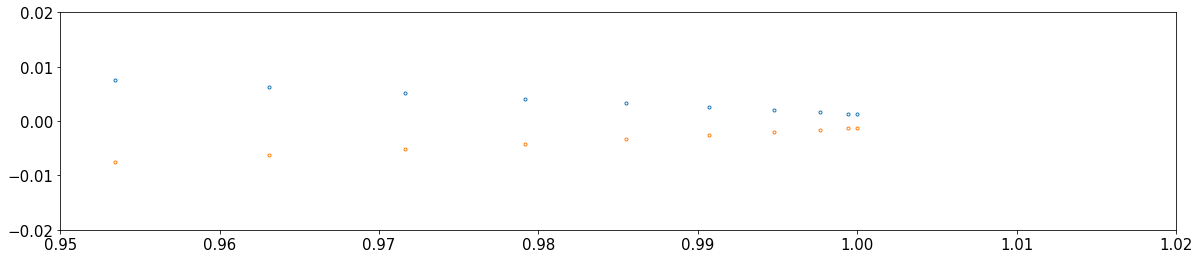

In [29]:
plt.figure(figsize=(20,4))
plt.plot(x_t,y_t,'.')
plt.plot(x_b,y_b,'.')
#plt.ylim([-0.1,0.1])
plt.ylim([-0.02,0.02])
plt.xlim([0.95,1.02])

In [30]:
def edge_point(x_t,y_t):
    
    x_c = 0.98 - 0.004*0.98
    y_c = 0

    xa = np.asarray([])
    ya = np.asarray([])
    for i in range(len(x_t)):
        xa = np.concatenate((xa,x_t[i]),axis=None)
        ya = np.concatenate((ya,y_t[i]),axis=None)
        if x_t[i] > 0.98:
            break
    xa[-1] = 0.98
    ya[-1] = 0
    
    k = (ya[-2] - ya[-3])/(xa[-2] - xa[-3])
    #print(k)
    kk = -1/k

    ax = -((y_c - kk*x_c) - (ya[-2] - k*xa[-2])) / (kk - k)
    ay = kk*ax + y_c - kk*x_c
    
    xa[-2] = ax
    ya[-2] = ay
    
    print(np.sqrt((ay-y_c)**2+(ax-x_c)**2)+x_c)
    
    return xa,ya,x_c,y_c

In [31]:
xmt,ymt,x_c,y_c = edge_point(x_t,y_t)
xmb,ymb,x_c,y_c = edge_point(x_b,y_b)
xmt[-1] = 0.9806044385883823

0.9806044385883823
0.9806044385883823


(0.95, 1.02)

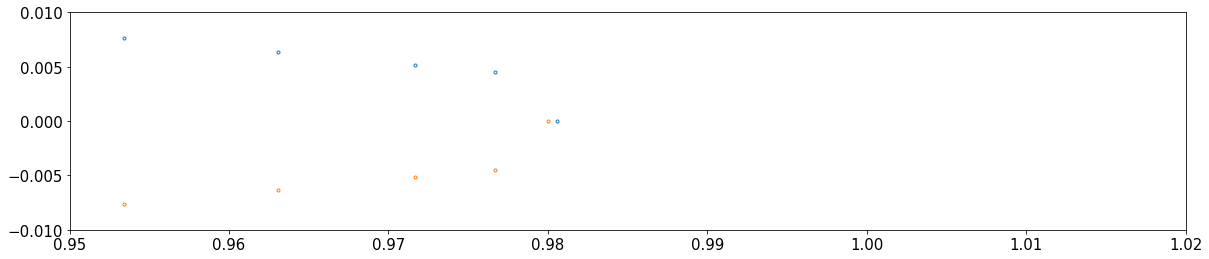

In [32]:
plt.figure(figsize=(20,4))
plt.plot(xmt,ymt,'.')
plt.plot(xmb,ymb,'.')

#plt.ylim([-0.1,0.1])
plt.ylim([-0.01,0.01])
plt.xlim([0.95,1.02])

In [33]:
xmb=xmb[::-1]
ymb=ymb[::-1]

In [34]:
x = np.concatenate((xmt,xmb[1:-1]),axis=None)
y = np.concatenate((ymt,ymb[1:-1]),axis=None)

(-0.1, 0.1)

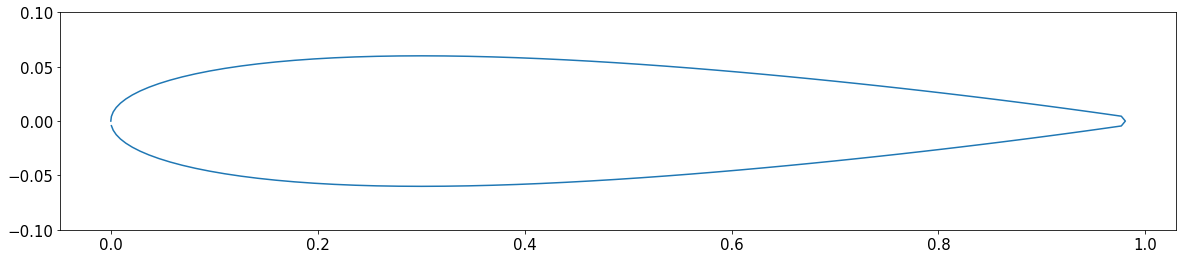

In [35]:
plt.figure(figsize=(20,4))
plt.plot(x,y,'-')
plt.ylim([-0.1,0.1])
#plt.ylim([-0.01,0.01])
#plt.xlim([0.95,1.02])

In [16]:
##write to gmsh format
f = open("aerofoil.txt", "a")

f.write('//NACA 0012 with modification at trailing edge\n')

#points
for i in range(len(x)):
    f.write('Point('+str(i+1)+')'+' = '+'{'+str(x[i])+', '+str(y[i])+', 0, 1.0};'+'\n')
f.write('Point('+str(i+2)+')'+' = '+'{'+str(x_c)+', '+str(y_c)+', 0, 1.0};'+'\n')  #central point

#lines
f.write('Circle(1) = {60, 121, 62};\n')
for i in range(len(x)):
    if i + 1 <= 59:
        f.write('Line('+str(i+2)+') = {'+str(i+1)+', '+str(i+2)+'};\n')
    elif i + 1 >= 62:
        if i + 1 == 120:
            f.write('Line(121)={120, 1};\n')
        else:
            f.write('Line('+str(i+2)+') = {'+str(i+1)+', '+str(i+2)+'};\n')
    
f.close()

In [17]:
##write to gmsh format
f = open("aerofoil_spline.txt", "a")

f.write('//NACA 0012 with modification at trailing edge\n')

#points aerofoil
for i in range(len(x)):
    f.write('Point('+str(i+1)+')'+' = '+'{'+str(x[i])+', '+str(y[i])+', 0, 1.0};'+'\n')
f.write('Point('+str(i+2)+')'+' = '+'{'+str(x_c)+', '+str(y_c)+', 0, 1.0};'+'\n')  #central point
f.write('Point('+str(i+3)+')'+' = '+'{'+str(0.9806044385883823)+', '+str(0.0)+', 0, 1.0};'+'\n')  #central point



#lines
f.write('Circle(1) = {60, 121, 62};\n')
f.write('Spline(2) = {')
for i in range(len(x)):
    if i + 1 >=62:
        f.write(str(i+1)+', ')
for i in range(len(x)):
    if i + 1 < 59:
        f.write(str(i+1)+', ')
    elif i == 59:
        f.write('60};\n ')


f.close()

In [8]:
print(len(xmt))

61


In [56]:
## calculate stractured mesh points
"""ky = np.zeros(len(x))
kx = np.zeros(len(x))
for i in range(len(x)):
    if i == 0:
        ky[i] = -0
        kx[i] = 0
    elif i == len(x) - 1:
        ky[i] = (y[0]-y[-1])
        kx[i] = (x[0]-x[-1])
    elif i == len(xmt) - 2 :
        ky[i] = ky[i-1]
        kx[i] = kx[i-1]
    elif i == len(xmt):
        ky[i] = 100
    elif i == len(xmt) - 1:
        ky[i] = 0
        kx[i] = 0
    else:
        ky[i] = (y[i+1]-y[i-1])
        kx[i] = (x[i+1]-x[i-1])
ky[len(xmt)] = ky[len(xmt)+1]
kx[len(xmt)] = kx[len(xmt)+1]

theta = np.arctan2(kx,-ky)
theta[len(xmt)-1] = 0
r = 0.1
yy = r*np.sin(theta)+y
xx = r*np.cos(theta)+x
#print(theta*180/pi)"""
xx = np.zeros(len(x))
yy = np.zeros(len(y))
xx = xx + (x - (max(x)+min(x))/2)*2 + (max(x)+min(x))/2
yy = yy + (y - 0)*2

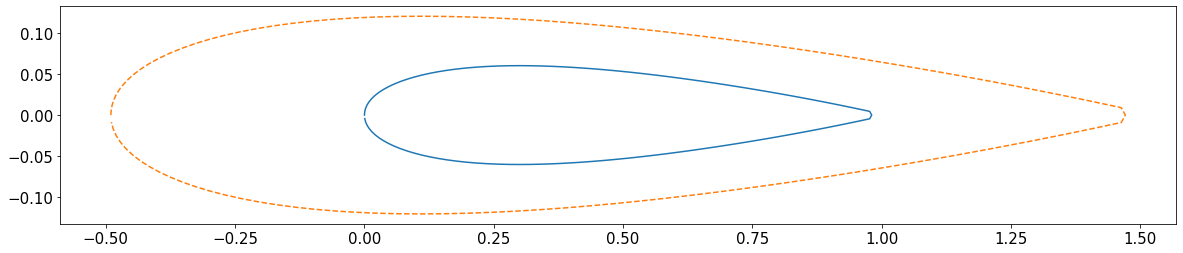

In [57]:
plt.figure(figsize=(20,4))
plt.plot(x,y,'-')
plt.plot(xx,yy,'--')
#plt.ylim([-0.1,0.1])
#plt.ylim([-0.01,0.01])
#plt.xlim([0.95,1.02])

In [49]:
##write to gmsh format
f = open("aerofoil_spline.txt", "a")

f.write('//NACA 0012 with modification at trailing edge\n')

#points aerofoil
for i in range(len(x)):
    f.write('Point('+str(i+1)+')'+' = '+'{'+str(x[i])+', '+str(y[i])+', 0, 1.0};'+'\n')
f.write('Point('+str(i+2)+')'+' = '+'{'+str(x_c)+', '+str(y_c)+', 0, 1.0};'+'\n')  #central point

f.write('\n')

f.close()


f = open("aerofoil_spline.txt", "a")
#points mesh
for i in range(len(xx)):
    f.write('Point('+str(200+i+1)+')'+' = '+'{'+str(xx[i])+', '+str(yy[i])+', 0, 1.0};'+'\n')
f.write('Point('+str(200+i+2)+')'+' = '+'{'+str(x_c)+', '+str(y_c)+', 0, 1.0};'+'\n')  #central point
f.close()

120


0.9950547536867305


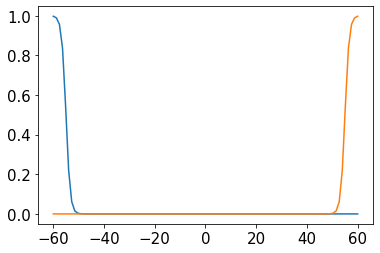

In [96]:
x = np.linspace(-60,60,100)
x1=50
x2=60
plt.plot(x,0.5-0.5*np.tanh( 3 * (x+(x1+x2)/2)/((x2-x1)/2) ))
plt.plot(x,0.5+0.5*np.tanh( 3 * (x-(x1+x2)/2)/((x2-x1)/2) ))
print(np.tanh(3))

## 